# Stoneburner, Kurt
- ## DSC 640 - Week XX

In [37]:
import os
import sys
# //*** Imports and Load Data
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

#//*** Use the whole window in the IPYNB editor
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

#//*** Maximize columns and rows displayed by pandas
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)

In [38]:
raw_df = pd.read_excel("z_wk01_allhlcn20.xlsx")

In [315]:
state_df = raw_df[ (raw_df['Area Type'] == "State") ]
ca_df = state_df[state_df["St Name"]=="California"]
ca_df

,Area\nCode,St,Cnty,Own,NAICS,Year,Qtr,Area Type,St Name,Area,Ownership,Industry,Annual Average Status Code,Annual Average Establishment Count,Annual Average Employment,Annual Total Wages,Annual Average Weekly Wage,Annual Average Pay,Employment Location Quotient Relative to U.S.,Total Wage Location Quotient Relative to U.S.
3353,06000,06,0.0,0,10,2020,A,State,California,California -- Statewide,Total Covered,"10 Total, all industries",NaN,1627484,16376295,1301826279330,1529,79495,1.00,1.00
3354,06000,06,0.0,1,10,2020,A,State,California,California -- Statewide,Federal Government,"10 Total, all industries",NaN,3334,260068,22718907478,1680,87358,0.75,0.62
3355,06000,06,0.0,2,10,2020,A,State,California,California -- Statewide,State Government,"10 Total, all industries",NaN,13637,474295,42584813264,1727,89785,0.88,0.96
3356,06000,06,0.0,3,10,2020,A,State,California,California -- Statewide,Local Government,"10 Total, all industries",NaN,19348,1677176,122885828106,1409,73269,1.04,1.08
3357,06000,06,0.0,5,10,2020,A,State,California,California -- Statewide,Private,"10 Total, all industries",NaN,1591166,13964756,1113636730482,1534,79746,1.01,1.01
3358,06000,06,0.0,5,101,2020,A,State,California,California -- Statewide,Private,101 Goods-producing,NaN,148897,2544673,222672030038,1683,87505,1.03,1.03
3359,06000,06,0.0,5,1011,2020,A,State,California,California -- Statewide,Private,1011 Natural resources and mining,NaN,17731,425665,18110640593,818,42547,2.03,1.14
3360,06000,06,0.0,5,1012,2020,A,State,California,California -- Statewide,Private,1012 Construction,NaN,86778,855713,65687839201,1476,76764,1.01,0.93
3361,06000,06,0.0,5,1013,2020,A,State,California,California -- Statewide,Private,1013 Manufacturing,NaN,44388,1263295,138873550244,2114,109930,0.89,1.07
3362,06000,06,0.0,5,102,2020,A,State,California,California -- Statewide,Private,102 Service-providing,NaN,1442269,11420083,890964700444,1500,78017,1.00,1.00


In [40]:
raw_df[ (raw_df['Area Type']=='Nation') & (raw_df["Industry"]=="10 Total, all industries") ] 

all_cols = ['Area\nCode', 'St', 'Cnty', 'Own', 'NAICS', 'Year', 'Qtr', 'Area Type',
       'St Name', 'Area', 'Ownership', 'Industry',
       'Annual Average Status Code', 'Annual Average Establishment Count',
       'Annual Average Employment', 'Annual Total Wages',
       'Annual Average Weekly Wage', 'Annual Average Pay',
       'Employment Location Quotient Relative to U.S.',
       'Total Wage Location Quotient Relative to U.S.']
nation_cols = ['Area Type','Ownership', 'Industry',
       'Annual Average Establishment Count',
       'Annual Average Employment', 'Annual Total Wages',
       'Annual Average Weekly Wage', 'Annual Average Pay',
       'Employment Location Quotient Relative to U.S.',
       'Total Wage Location Quotient Relative to U.S.']

nation_df = raw_df[nation_cols]
nation_df = nation_df[ (nation_df['Area Type']=='Nation') & (nation_df["Industry"]=="10 Total, all industries") ] 
nation_df = nation_df[nation_df["Ownership"] != "Total Covered"]
nation_df

,Area Type,Ownership,Industry,Annual Average Establishment Count,Annual Average Employment,Annual Total Wages,Annual Average Weekly Wage,Annual Average Pay,Employment Location Quotient Relative to U.S.,Total Wage Location Quotient Relative to U.S.
1,Nation,Federal Government,"10 Total, all industries",61310,2927788,250261448866,1644,85478,1.0,1.0
2,Nation,State Government,"10 Total, all industries",70057,4590784,301891443958,1265,65760,1.0,1.0
3,Nation,Local Government,"10 Total, all industries",171046,13643540,776056455733,1094,56881,1.0,1.0
4,Nation,Private,"10 Total, all industries",10192539,117944857,7576501397400,1235,64238,1.0,1.0


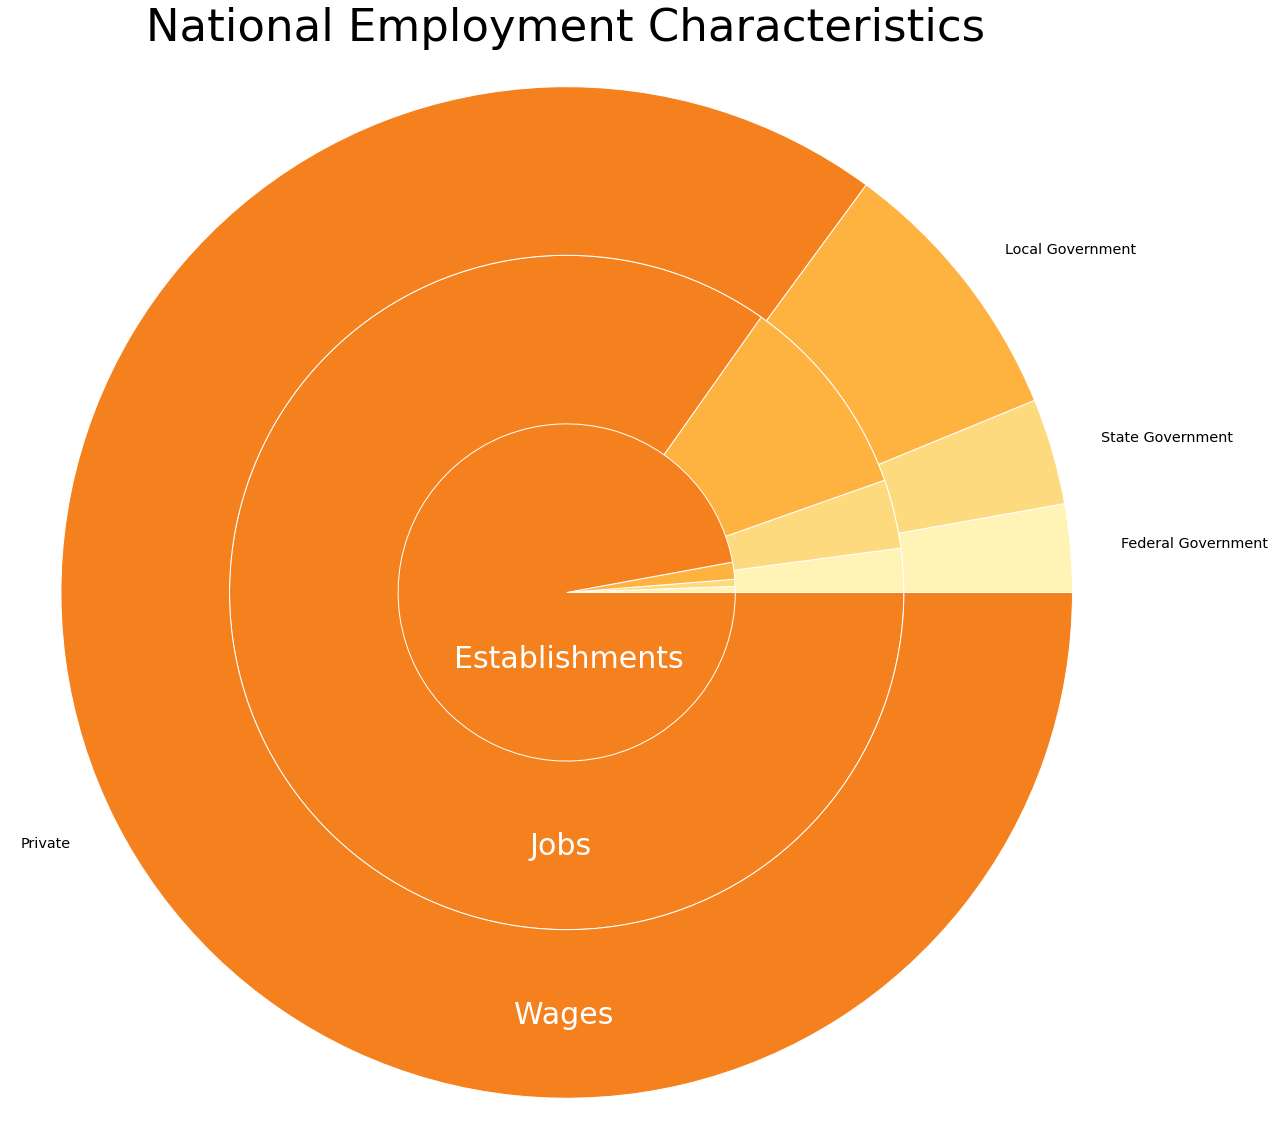

In [264]:
x3 = "Annual Total Wages"
x2 = "Annual Average Employment"
x1 = "Annual Average Establishment Count"
y = "Ownership"


plot_df = nation_df

size =3
scale=1.5
wedge = size
colors = sns.color_palette('YlOrBr')[0:len(plot_df[x])]
fig1, ax1 = plt.subplots()

fig = plt.gcf()
fig.set_size_inches(20, 20)

ax1.pie(plot_df[x1],
        #labels=plot_df[y], 
        #autopct='%1.1f%%',
        shadow=True,
        colors=colors,
        radius=size,
        wedgeprops=dict(edgecolor='w'),
        startangle=0,)
size*=scale
wedge=size/2

ax1.pie(plot_df[x2],
        #labels=plot_df[y], 
        #autopct='%1.1f%%',
        shadow=True,
        colors=colors,
        radius=size,
        wedgeprops=dict(width=wedge,edgecolor='w'),
        startangle=0,)
wedge=size/2
size*=scale

ax1.pie(plot_df[x3],
        labels=plot_df[y], 
        #autopct='%1.1f%%',
        shadow=False,
        colors=colors,
        radius=size,
        wedgeprops=dict(width=wedge,edgecolor='w'),
        textprops = {'size': 'x-large'},
        startangle=0,)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

font = {'color' : 'black'}
fontsize=30
plt.annotate("Establishments",xy=(-1.5,-1),fontsize=fontsize,color='white')
plt.annotate("Jobs",xy=(-.5,-3.5),fontsize=fontsize,color='white')
plt.annotate("Wages",xy=(-.7,-5.75),fontsize=fontsize,color='white')
plt.title("National Employment Characteristics",fontsize=fontsize*1.5)
#plt.legend()
plt.show()

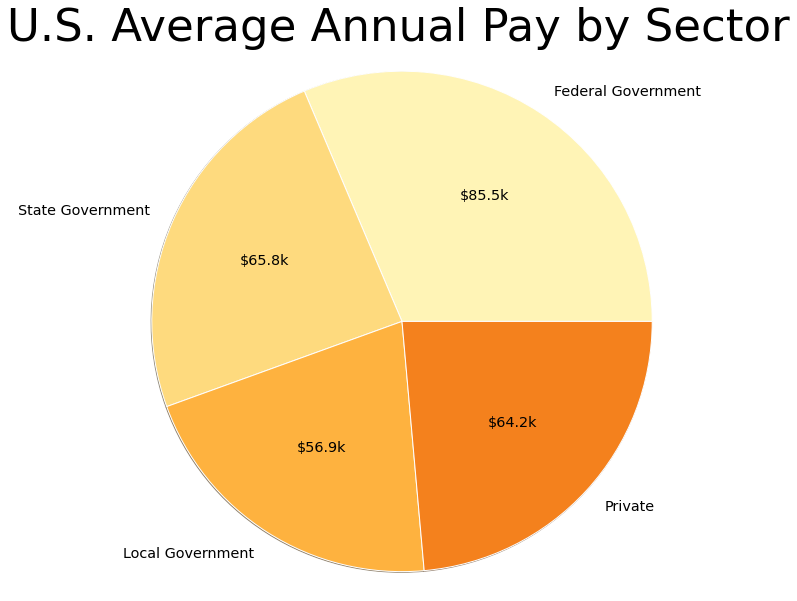

In [298]:
x3 = "Annual Total Wages"
x2 = "Annual Average Employment"
x1 = "Annual Average Pay"
y = "Ownership"


plot_df = nation_df

size =7
scale=1.5
wedge = size
colors = sns.color_palette('YlOrBr')[0:len(plot_df[x])]
fig1, ax1 = plt.subplots()

fig = plt.gcf()
fig.set_size_inches(10, 10)

total = plot_df[x1].sum()

ax1.pie(plot_df[x1],
        labels=plot_df[y], 
        autopct = lambda p: '${:.01f}k'.format(p * total / 100000),
        shadow=True,
        colors=colors,
        radius=size,
        wedgeprops=dict(edgecolor='w'),
        textprops = {'size': 'x-large'},
        startangle=0,)

ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title("U.S. Average Annual Pay by Sector",fontsize=fontsize*1.5)
#plt.legend()
plt.show()

In [299]:
state_df

,Area\nCode,St,Cnty,Own,NAICS,Year,Qtr,Area Type,St Name,Area,Ownership,Industry,Annual Average Status Code,Annual Average Establishment Count,Annual Average Employment,Annual Total Wages,Annual Average Weekly Wage,Annual Average Pay,Employment Location Quotient Relative to U.S.,Total Wage Location Quotient Relative to U.S.
18,01000,01,0.0,0,10,2020,A,State,Alabama,Alabama -- Statewide,Total Covered,"10 Total, all industries",NaN,132001,1910169,99619444620,1003,52152,1.00,1.00
19,01000,01,0.0,1,10,2020,A,State,Alabama,Alabama -- Statewide,Federal Government,"10 Total, all industries",NaN,1250,55888,4820416591,1659,86252,1.39,1.72
20,01000,01,0.0,2,10,2020,A,State,Alabama,Alabama -- Statewide,State Government,"10 Total, all industries",NaN,1365,97435,5625429688,1110,57735,1.55,1.67
21,01000,01,0.0,3,10,2020,A,State,Alabama,Alabama -- Statewide,Local Government,"10 Total, all industries",NaN,3702,208839,9631021976,887,46117,1.11,1.11
22,01000,01,0.0,5,10,2020,A,State,Alabama,Alabama -- Statewide,Private,"10 Total, all industries",NaN,125684,1548007,79542576365,988,51384,0.96,0.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55731,56000,56,0.0,5,1024,2020,A,State,Wyoming,Wyoming -- Statewide,Private,1024 Professional and business services,NaN,4991,18354,1105052453,1158,60209,0.48,0.43
55732,56000,56,0.0,5,1025,2020,A,State,Wyoming,Wyoming -- Statewide,Private,1025 Education and health services,NaN,3486,26932,1248088204,891,46342,0.64,0.68
55733,56000,56,0.0,5,1026,2020,A,State,Wyoming,Wyoming -- Statewide,Private,1026 Leisure and hospitality,NaN,2421,32269,743850729,443,23051,1.34,1.50
55734,56000,56,0.0,5,1027,2020,A,State,Wyoming,Wyoming -- Statewide,Private,1027 Other services,NaN,1667,6764,272455135,775,40283,0.91,1.05


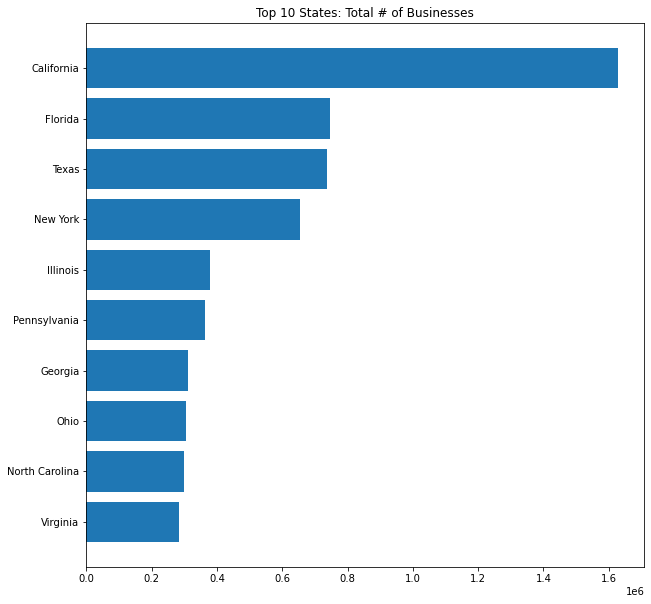

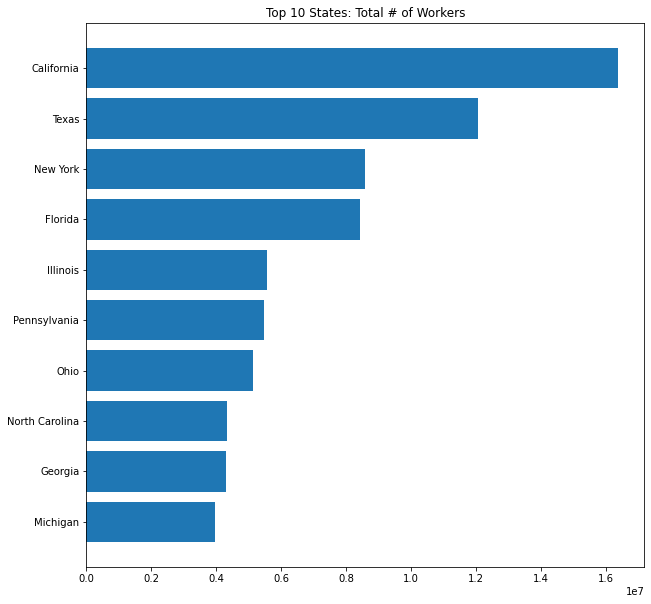

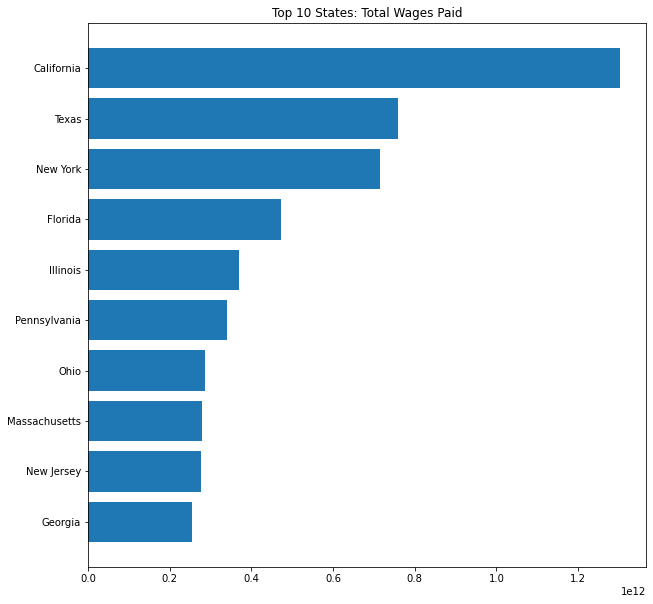

In [336]:
x3 = "Annual Total Wages"
x2 = "Annual Average Employment"
x1 = "Annual Average Pay"
x4 = "Annual Average Establishment Count"
y = "St Name"
state_df = raw_df[ (raw_df['Area Type'] == "State") & (raw_df["Ownership"] == "Total Covered")]


x_col= x4
plot_df = state_df.sort_values(x_col,ascending=False).iloc[0:10]

plot_df = plot_df.sort_values(x_col,ascending=True)

fig1, ax = plt.subplots()

fig = plt.gcf()
fig.set_size_inches(10, 10)

ax.barh(plot_df[y],plot_df[x_col])

plt.title("Top 10 States: Total # of Businesses")
plt.show()




x_col= x2

plot_df = state_df.sort_values(x_col,ascending=False).iloc[0:10]



plot_df = plot_df.sort_values(x_col,ascending=True)

fig1, ax = plt.subplots()

fig = plt.gcf()
fig.set_size_inches(10, 10)

ax.barh(plot_df[y],plot_df[x_col])


plt.title("Top 10 States: Total # of Workers")
plt.show()

x_col= x3

plot_df = state_df.sort_values(x_col,ascending=False).iloc[0:10]



plot_df = plot_df.sort_values(x_col,ascending=True)

fig1, ax = plt.subplots()

fig = plt.gcf()
fig.set_size_inches(10, 10)

ax.barh(plot_df[y],plot_df[x_col])


plt.title("Top 10 States: Total Wages Paid")
plt.show()

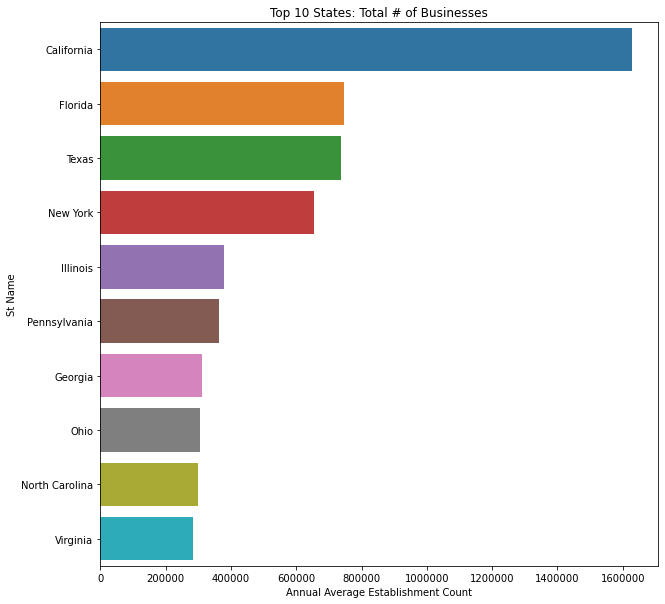

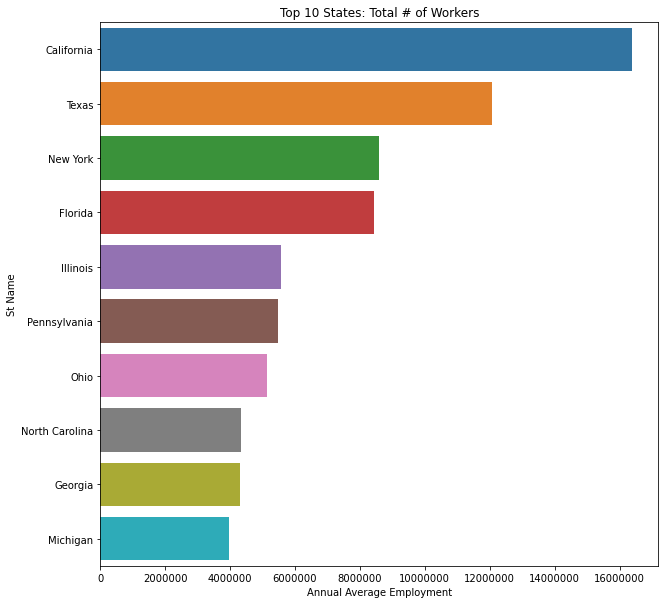

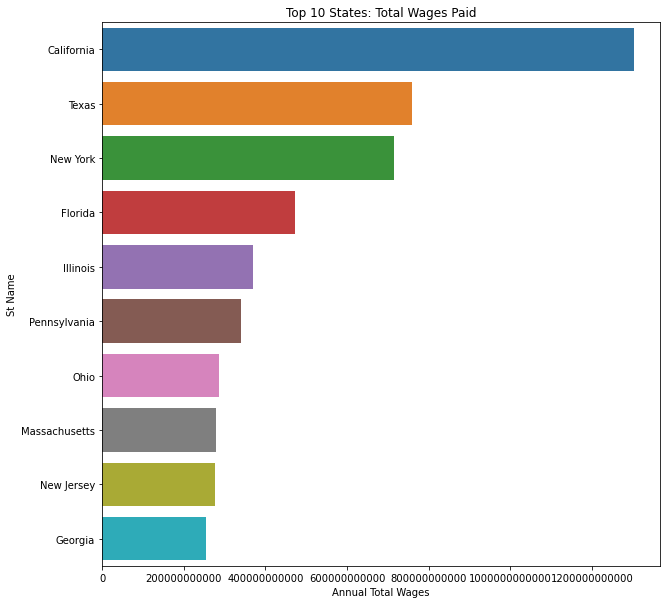

In [358]:
x3 = "Annual Total Wages"
x2 = "Annual Average Employment"
x1 = "Annual Average Pay"
x4 = "Annual Average Establishment Count"
y = "St Name"
state_df = raw_df[ (raw_df['Area Type'] == "State") & (raw_df["Ownership"] == "Total Covered")]


x_col= x4
plot_df = state_df.sort_values(x_col,ascending=False).iloc[0:10][[y,x_col]]

f, ax = plt.subplots()

fig = plt.gcf()
fig.set_size_inches(10, 10)

sns.barplot(plot_df[x_col],plot_df[y])
ax.ticklabel_format(style='plain', axis="x")
plt.title("Top 10 States: Total # of Businesses")
plt.show()

x_col= x2

plot_df = state_df.sort_values(x_col,ascending=False).iloc[0:10][[y,x_col]]



fig, ax = plt.subplots()

fig = plt.gcf()
fig.set_size_inches(10, 10)

sns.barplot(plot_df[x_col],plot_df[y])

ax.ticklabel_format(style='plain', axis="x")

plt.title("Top 10 States: Total # of Workers")
plt.show()


x_col= x3

plot_df = state_df.sort_values(x_col,ascending=False).iloc[0:10][[y,x_col]]



fig1, ax = plt.subplots()

fig = plt.gcf()
fig.set_size_inches(10, 10)

sns.barplot(plot_df[x_col],plot_df[y])
ax.ticklabel_format(style='plain', axis="x")

plt.title("Top 10 States: Total Wages Paid")
plt.show()


In [312]:
state_df.sort_values(x4,ascending=False)

,Area\nCode,St,Cnty,Own,NAICS,Year,Qtr,Area Type,St Name,Area,Ownership,Industry,Annual Average Status Code,Annual Average Establishment Count,Annual Average Employment,Annual Total Wages,Annual Average Weekly Wage,Annual Average Pay,Employment Location Quotient Relative to U.S.,Total Wage Location Quotient Relative to U.S.
3353,06000,06,0.0,0,10,2020,A,State,California,California -- Statewide,Total Covered,"10 Total, all industries",NaN,1627484,16376295,1301826279330,1529,79495,1.00,1.00
3357,06000,06,0.0,5,10,2020,A,State,California,California -- Statewide,Private,"10 Total, all industries",NaN,1591166,13964756,1113636730482,1534,79746,1.01,1.01
3362,06000,06,0.0,5,102,2020,A,State,California,California -- Statewide,Private,102 Service-providing,NaN,1442269,11420083,890964700444,1500,78017,1.00,1.00
5869,12000,12,0.0,0,10,2020,A,State,Florida,Florida -- Statewide,Total Covered,"10 Total, all industries",NaN,747034,8444982,471508743986,1074,55833,1.00,1.00
5873,12000,12,0.0,5,10,2020,A,State,Florida,Florida -- Statewide,Private,"10 Total, all industries",NaN,741148,7387056,409275646867,1065,55404,1.03,1.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50105,50000,50,0.0,5,1029,2020,A,State,Vermont,Vermont -- Statewide,Private,1029 Unclassified,NaN,3,3,253159,1947,101264,0.01,0.01
23639,27000,27,0.0,5,1029,2020,A,State,Minnesota,Minnesota -- Statewide,Private,1029 Unclassified,NaN,1,1,44332,731,37999,0.00,0.00
10098,16000,16,0.0,5,1029,2020,A,State,Idaho,Idaho -- Statewide,Private,1029 Unclassified,NaN,0,0,0,0,0,0.00,0.00
5754,10000,10,0.0,5,1029,2020,A,State,Delaware,Delaware -- Statewide,Private,1029 Unclassified,NaN,0,0,13492,3114,161904,0.00,0.00


In [273]:
temp_df = raw_df[(raw_df['Ownership']=='Total Covered') & (raw_df['Area Type']=='State')].sort_values("Annual Average Pay",ascending = False)

temp_df = temp_df[["St Name","Annual Average Pay"]]

temp_df

,St Name,Annual Average Pay
5823,District of Columbia,107036
21812,Massachusetts,83675
32666,New York,83117
3353,California,79495
52780,Washington,76771
5557,Connecticut,75395
31661,New Jersey,73953
21349,Maryland,68882
4413,Colorado,66662
10864,Illinois,66290


In [ ]:
# //*** CODE HERE